# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | kaeo
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | muroto
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | mokhsogollokh
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | bath
Processing Record 15 of Set 1 | mandalgovi
Processing Record 16 of Set 1 | freetown
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | khatanga
Processing Rec

Processing Record 39 of Set 4 | lasem
Processing Record 40 of Set 4 | talcahuano
Processing Record 41 of Set 4 | rio gallegos
Processing Record 42 of Set 4 | chirongui
Processing Record 43 of Set 4 | onda
Processing Record 44 of Set 4 | castro
Processing Record 45 of Set 4 | kaitangata
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | saleaula
City not found. Skipping...
Processing Record 49 of Set 4 | balangir
Processing Record 0 of Set 5 | maceio
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | salalah
Processing Record 3 of Set 5 | libreville
Processing Record 4 of Set 5 | yulara
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | norman wells
Processing Record 9 of Set 5 | harper
Processing Record 10 of Set 5 | mayo
Processing Record 11 of Set 5 | slave lake
Processi

Processing Record 28 of Set 8 | malanje
Processing Record 29 of Set 8 | krasnoye
Processing Record 30 of Set 8 | hamilton
Processing Record 31 of Set 8 | bahia blanca
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | marawi
Processing Record 34 of Set 8 | soe
Processing Record 35 of Set 8 | nguiu
City not found. Skipping...
Processing Record 36 of Set 8 | surt
Processing Record 37 of Set 8 | maputo
Processing Record 38 of Set 8 | nguruka
Processing Record 39 of Set 8 | uzventis
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | touros
Processing Record 42 of Set 8 | bathsheba
Processing Record 43 of Set 8 | gurgan
City not found. Skipping...
Processing Record 44 of Set 8 | kununurra
Processing Record 45 of Set 8 | port blair
Processing Record 46 of Set 8 | paucartambo
City not found. Skipping...
Processing Record 47 of Set 8 | taseyevo
Processing Record 48 of Set 8 | ugoofaaru
Processing Record 49 of Set 8 | kontagora
Processing Record 0 of Set

Processing Record 16 of Set 12 | mana
Processing Record 17 of Set 12 | forio
Processing Record 18 of Set 12 | presidencia roque saenz pena
Processing Record 19 of Set 12 | sobolevo
Processing Record 20 of Set 12 | boa vista
Processing Record 21 of Set 12 | andra
Processing Record 22 of Set 12 | batagay
Processing Record 23 of Set 12 | severnoye
Processing Record 24 of Set 12 | gariaband
Processing Record 25 of Set 12 | ostersund
Processing Record 26 of Set 12 | araxa
Processing Record 27 of Set 12 | policoro
Processing Record 28 of Set 12 | nyzhnya duvanka
Processing Record 29 of Set 12 | bintulu
Processing Record 30 of Set 12 | karasburg
Processing Record 31 of Set 12 | hobyo
Processing Record 32 of Set 12 | atasu
Processing Record 33 of Set 12 | geraldton
Processing Record 34 of Set 12 | buraydah
Processing Record 35 of Set 12 | gurdaspur
City not found. Skipping...
Processing Record 36 of Set 12 | mecca
Processing Record 37 of Set 12 | bur gabo
City not found. Skipping...
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [35]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,69.01,86,5,3.00,AU,1613436465
1,kaeo,-35.1000,173.7833,77.00,80,82,15.99,NZ,1613436610
2,muroto,33.2833,134.1500,48.20,49,40,2.30,JP,1613436635
3,ushuaia,-54.8000,-68.3000,57.20,51,75,13.80,AR,1613436352
4,rikitea,-23.1203,-134.9692,80.19,77,0,12.01,PF,1613436635


In [36]:
city_data_pd.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.588612,19.269968,48.589983,75.272097,53.318891,8.386967,1.613437e+09
std,33.880565,91.798835,31.947649,17.652327,41.624590,5.997855,8.399923e+01
min,-54.800000,-179.166700,-28.430000,10.000000,0.000000,0.340000,1.613436e+09
25%,-8.767600,-60.673300,25.590000,67.000000,1.000000,3.890000,1.613437e+09
50%,22.566700,21.376000,60.010000,80.000000,73.000000,6.910000,1.613437e+09
75%,47.666600,102.265500,75.250000,88.000000,96.000000,11.630000,1.613437e+09
max,78.218600,179.316700,93.000000,100.000000,100.000000,36.080000,1.613437e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data


Int64Index([], dtype='int64')

In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,69.01,86,5,3.00,AU,1613436465
1,kaeo,-35.1000,173.7833,77.00,80,82,15.99,NZ,1613436610
2,muroto,33.2833,134.1500,48.20,49,40,2.30,JP,1613436635
3,ushuaia,-54.8000,-68.3000,57.20,51,75,13.80,AR,1613436352
4,rikitea,-23.1203,-134.9692,80.19,77,0,12.01,PF,1613436635


In [39]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

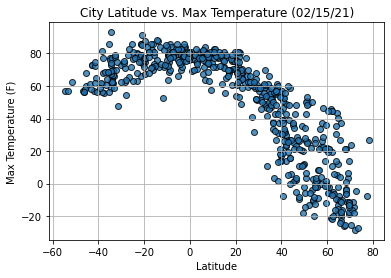

In [41]:
# Build scatter plot for latitude vs. temperature

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

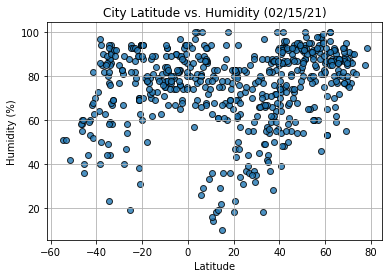

In [43]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

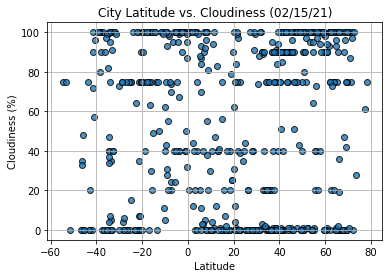

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


## Latitude vs. Wind Speed Plot

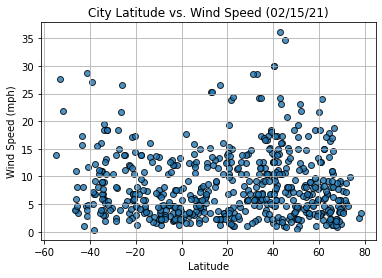

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


## Linear Regression

In [46]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [47]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.760364143429783


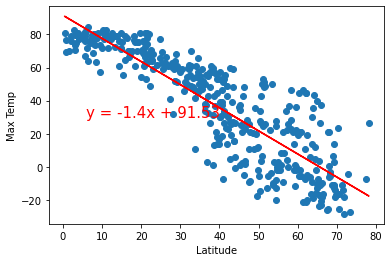

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.35461331611875874


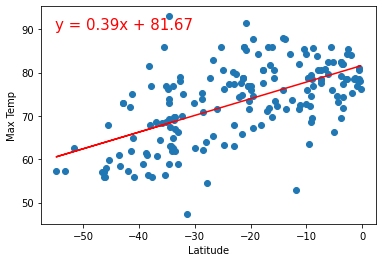

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09820125656105759


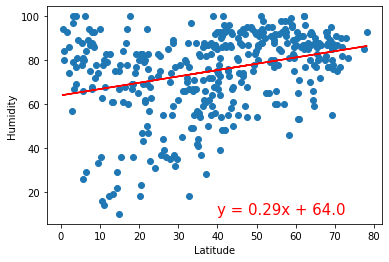

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14689232833528618


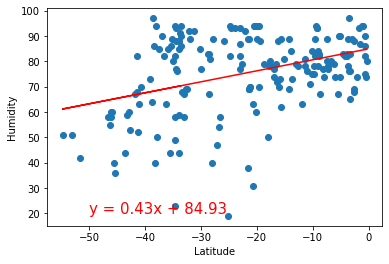

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04870464606665503


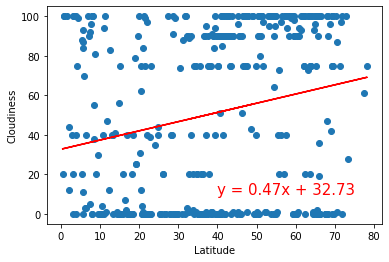

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07365509533069753


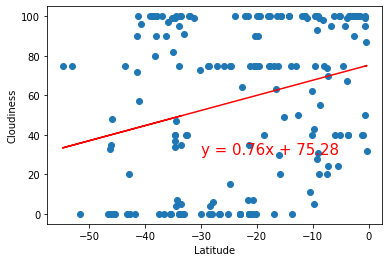

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0006329465207743811


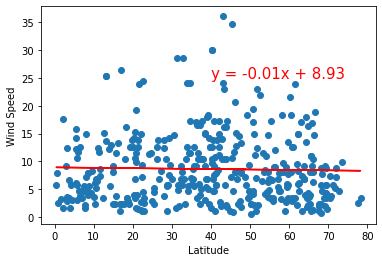

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09578220428564323


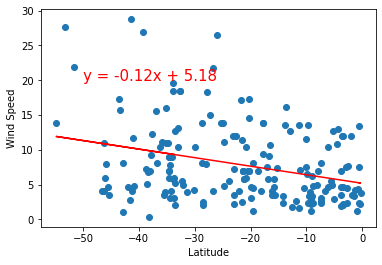

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))


The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.